In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from sklearn.manifold import TSNE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

# 1
a) Create training and test datasets for remaining parts according to day feature in
the dataset (column: ”day”) 

In [117]:
# Load the dataset
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')
# Create the training dataset
train_df = df[df['Day'].isin([0, 1, 2])]
test_df = df[df['Day'] == 3]

x_train=train_df.drop(["ID",'Day','Ligitimacy'],axis=1)
y_train=train_df['Ligitimacy']
x_test=test_df.drop(["ID",'Day','Ligitimacy'],axis=1)
y_test=test_df['Ligitimacy']

b)Provide confusion matrixes and F1 scores of NB and KNN classifier as baseline
performances. 

In [118]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
nb_f1_score=f1_score(y_test,nb_pred)
print("F1 Score: ",nb_f1_score)

F1 Score:  0.9322916666666667


In [119]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_f1_score=f1_score(y_test,knn_pred)
print("F1 Score: ",knn_f1_score)

F1 Score:  0.9227557411273487


c)Provide 2D TSNE plots, one for the training set and one for the test set.

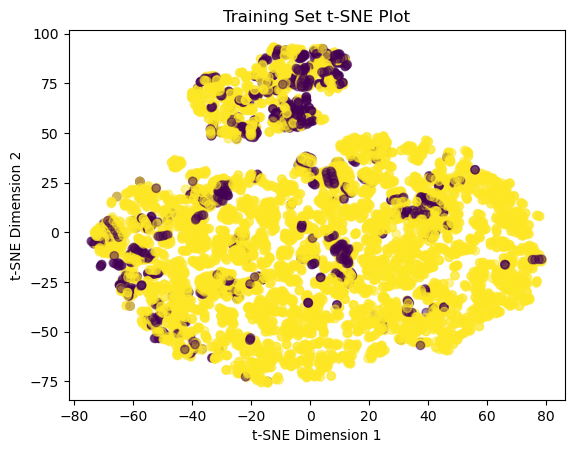

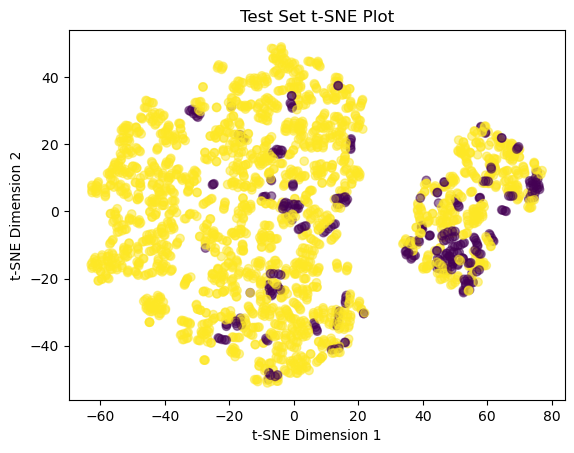

In [120]:
# Reduce the dimensionality of the data using t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# Plot the training set
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title("Training Set t-SNE Plot")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# Plot the test set
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis', alpha=0.5)
plt.title("Test Set t-SNE Plot")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# 2
(a) To find the best reduced dimensions of PCA and AE

In [121]:
# Define the range of dimensions/components for PCA and AE
dimensions = list(range(2, 11))
# Initialize lists to store F1 scores for each dimensionality reduction method
pca_f1_scores_nb = []
pca_f1_scores_knn = []
# Perform dimensionality reduction using PCA and AE for different dimensions
for n in dimensions:
    # PCA
    pca = PCA(n_components=n, random_state=0)
    pca_pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('pca', pca),
    ])
    X_train_pca = pca_pipeline.fit_transform(x_train)
    X_test_pca = pca_pipeline.transform(x_test)

    # Apply classifiers on the reduced data (after pca)
    nb.fit(X_train_pca, y_train)
    nb_pred_pca = nb.predict(X_test_pca)
    nb_f1_score_pca = f1_score(y_test, nb_pred_pca)
    pca_f1_scores_nb.append(nb_f1_score_pca)

    knn.fit(X_train_pca, y_train)
    knn_pred_pca = knn.predict(X_test_pca)
    knn_f1_score_pca = f1_score(y_test, knn_pred_pca)
    pca_f1_scores_knn.append(knn_f1_score_pca)




    
    
    ae_f1_scores_nb = []
    ae_f1_scores_knn = []
    #dimension = list(range(x_train.shape[1], 1, -1))
    dimension = list(range(2,11))
    scaler= MinMaxScaler()
X_train = scaler.fit_transform(x_train,y_train)
X_test = scaler.transform(x_test)
for n in dimension:
    # AE
    autoencoder = MLPRegressor(hidden_layer_sizes=[n], activation='relu', solver='adam',random_state=0)
    autoencoder.fit(X_train, X_train)

    # Reduce dimensionality with the trained autoencoder

    X_train_ae = autoencoder.predict(X_train)
    X_test_ae = autoencoder.predict(X_test)
    # Applying  the  classifiers on the reduced data (after ae)
    nb.fit(X_train_ae, y_train)
    nb_pred_ae = nb.predict(X_test_ae)
    nb_f1_score_ae = f1_score(y_test, nb_pred_ae)
    ae_f1_scores_nb.append(nb_f1_score_ae)

    knn.fit(X_train_ae, y_train)
    knn_pred_ae = knn.predict(X_test_ae)
    knn_f1_score_ae = f1_score(y_test, knn_pred_ae)
    ae_f1_scores_knn.append(knn_f1_score_ae)

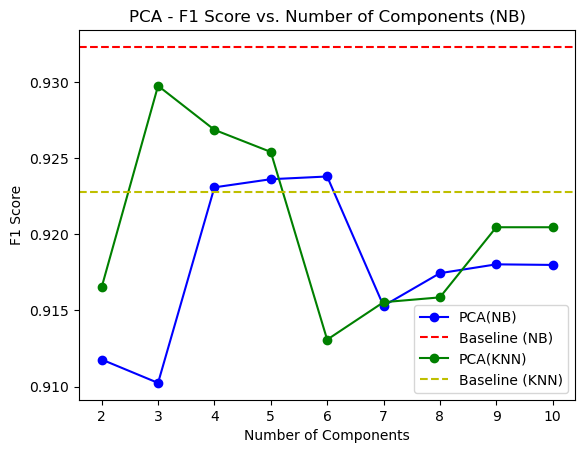

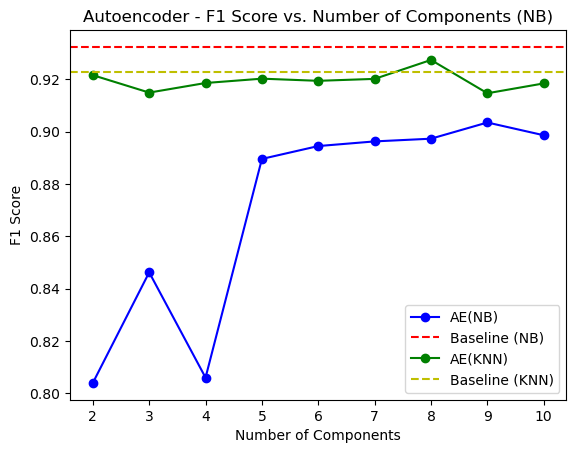

In [122]:
plt.plot(dimensions, pca_f1_scores_nb , marker='o', linestyle='-', color='b',label='PCA(NB)')
plt.axhline(nb_f1_score, linestyle='--', color='r', label='Baseline (NB)')
plt.plot(dimensions, pca_f1_scores_knn, marker='o', linestyle='-', color='g',label='PCA(KNN)')
plt.axhline(knn_f1_score, linestyle='--', color='y', label='Baseline (KNN)')
plt.title('PCA - F1 Score vs. Number of Components (NB)')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.show()



plt.plot( dimension,ae_f1_scores_nb, marker='o', linestyle='-', color='b', label='AE(NB)')
plt.axhline(nb_f1_score, linestyle='--', color='r', label='Baseline (NB)')
plt.plot( dimension,ae_f1_scores_knn, marker='o', linestyle='-', color='g', label='AE(KNN)')
plt.axhline(knn_f1_score, linestyle='--', color='y', label='Baseline (KNN)')
plt.title('Autoencoder - F1 Score vs. Number of Components (NB)')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

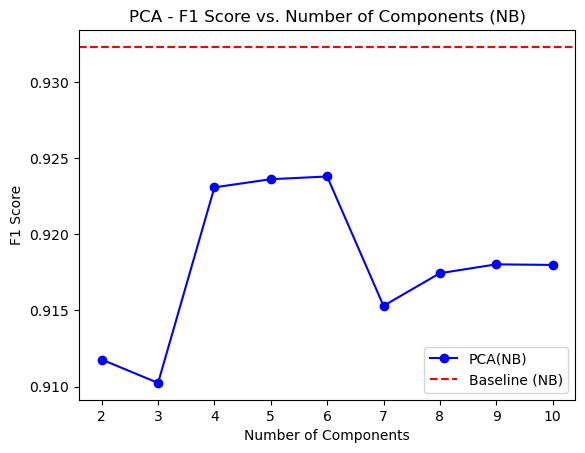

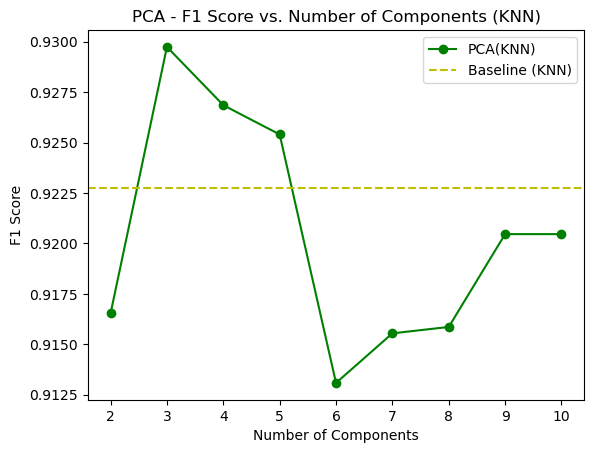

In [123]:
plt.plot(dimensions, pca_f1_scores_nb , marker='o', linestyle='-', color='b',label='PCA(NB)')
plt.axhline(nb_f1_score, linestyle='--', color='r', label='Baseline (NB)')
plt.title('PCA - F1 Score vs. Number of Components (NB)')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.show()



plt.plot(dimensions, pca_f1_scores_knn, marker='o', linestyle='-', color='g',label='PCA(KNN)')
plt.axhline(knn_f1_score, linestyle='--', color='y', label='Baseline (KNN)')
plt.title('PCA - F1 Score vs. Number of Components (KNN)')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.show()


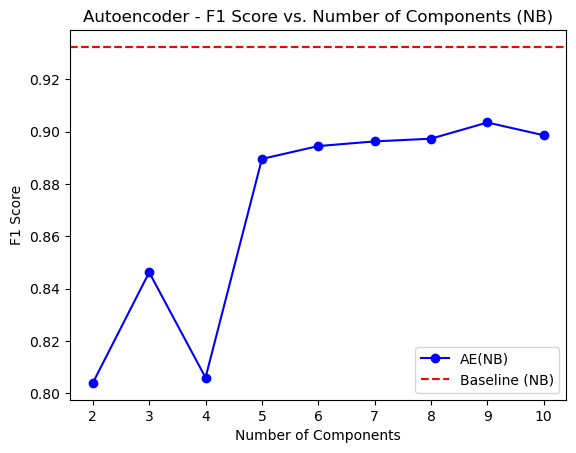

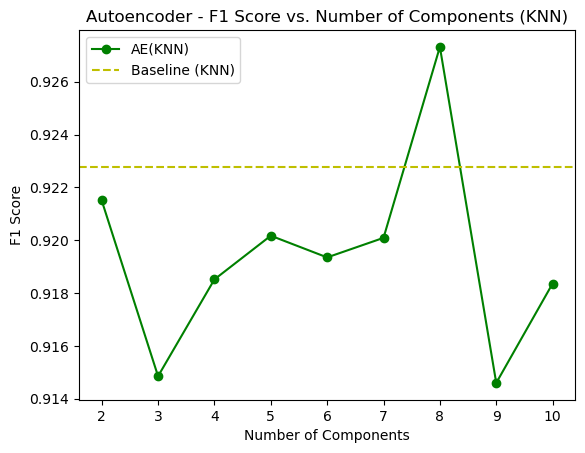

In [124]:
plt.plot( dimension,ae_f1_scores_nb, marker='o', linestyle='-', color='b', label='AE(NB)')
plt.axhline(nb_f1_score, linestyle='--', color='r', label='Baseline (NB)')
plt.title('Autoencoder - F1 Score vs. Number of Components (NB)')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.show()


plt.plot( dimension,ae_f1_scores_knn, marker='o', linestyle='-', color='g', label='AE(KNN)')
plt.axhline(knn_f1_score, linestyle='--', color='y', label='Baseline (KNN)')
plt.title('Autoencoder - F1 Score vs. Number of Components (KNN)')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# b)  Provide 2D TSNE plots

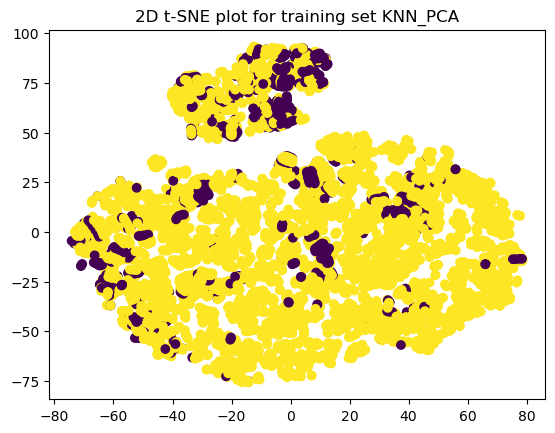

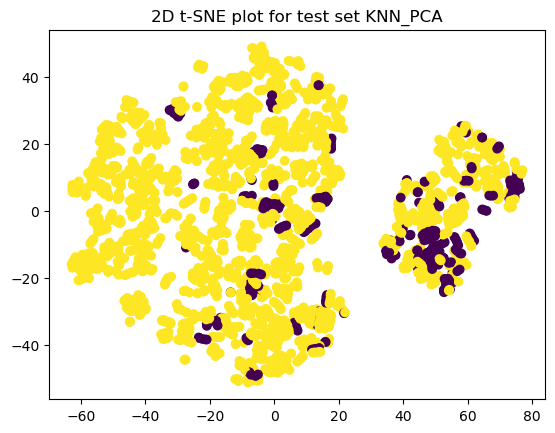

In [125]:
# Apply PCA with 10 components to the input data
pca = PCA(n_components=10, random_state=0)
reduced_train_data_pca = pca.fit_transform(X_train)
reduced_test_data_pca = pca.transform(X_test)

# Train the KNN classifier on the reduced data
knn_classifier_pca = KNeighborsClassifier(n_neighbors=5)
knn_classifier_pca.fit(reduced_train_data_pca, y_train)

# Generate 2D t-SNE plots for the training and test sets
tsne = TSNE(n_components=2, random_state=0)

# Plot the t-SNE plot for the training set
reduced_train_data_tsne = tsne.fit_transform(reduced_train_data_pca)
plt.scatter(reduced_train_data_tsne[:, 0], reduced_train_data_tsne[:, 1], c=y_train)
plt.title('2D t-SNE plot for training set KNN_PCA')
plt.show()

# Plot the t-SNE plot for the test set
reduced_test_data_tsne = tsne.fit_transform(reduced_test_data_pca)
plt.scatter(reduced_test_data_tsne[:, 0], reduced_test_data_tsne[:, 1], c=y_test)
plt.title('2D t-SNE plot for test set KNN_PCA')
plt.show()


# 3)

In [141]:
fsm = SelectKBest(chi2, k=5)  # Example feature selector
nb = GaussianNB()  # Example classifier
f1score = select_feature(X_train, y_train, X_test, y_test, fsm, nb)
print('F1 score:', f1score)  # Example usage

F1 score: 90.91337099811676


In [142]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.manifold import TSNE

def display_selected_feature(X_train, y_train, X_test, y_test, FSM, title):
    # Fit the feature selector on the training data and transform both the training and test data
    fs = FSM
    fs.fit(X_train, y_train)
    X_train_new = fs.transform(X_train)
    X_test_new = fs.transform(X_test)

    # Visualize the reduced training data using t-SNE and the training labels
    tsne_training = TSNE(n_components=2, random_state=0).fit_transform(X_train_new)
    display_TSNE(data_tsne_after_fit=tsne_training, y_for_color=y_train, title=title + ' - Training Data')

    # Visualize the reduced test data using t-SNE and the test labels
    tsne_test = TSNE(n_components=2, random_state=0).fit_transform(X_test_new)
    display_TSNE(data_tsne_after_fit=tsne_test, y_for_color=y_test, title=title + ' - Test Data')

Maximum f1 score nb: 90.96470588235293
Best number of features nb: 6
Maximum f1 score KNN: 93.95565927654609
Best number of features KNN: 8


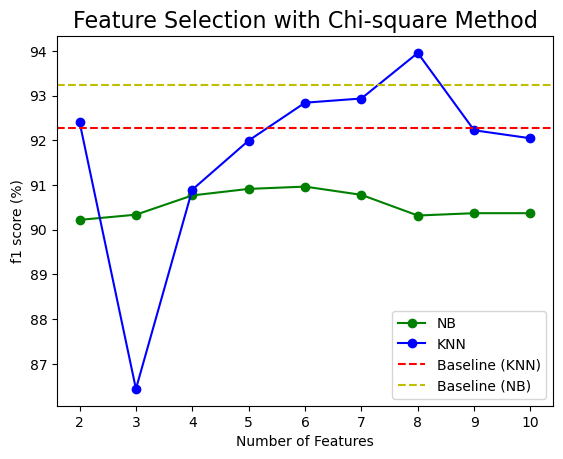

In [166]:
nb = GaussianNB()
knn=KNeighborsClassifier()

f1score_dict_nb = {}
f1score_dict_knn = {}
for nf in range(2,11):
    fsm =  SelectKBest(chi2, k=nf)
    f1score = select_feature(X_train, y_train, X_test, y_test, fsm, nb)
    f1score_dict_nb[nf] = f1score
    f1score = select_feature(X_train, y_train, X_test, y_test, fsm, knn)
    f1score_dict_knn[nf] = f1score

plt.plot(*zip(*sorted(f1score_dict_nb.items())),marker='o', linestyle='-', color='g', label='NB')
plt.plot(*zip(*sorted(f1score_dict_knn.items())),marker='o', linestyle='-', color='b', label='KNN')
plt.axhline(knn_f1_score*100, linestyle='--', color='r', label='Baseline (KNN)')
plt.axhline(nb_f1_score*100, linestyle='--', color='y', label='Baseline (NB)')
Title = "Feature Selection with Chi-square Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features")
plt.ylabel("f1 score (%)")
plt.legend()

print("Maximum f1 score nb:", max(f1score_dict_nb.values()))
print("Best number of features nb:", max(f1score_dict_nb, key=f1score_dict_nb.get))

print("Maximum f1 score KNN:", max(f1score_dict_knn.values()))
print("Best number of features KNN:", max(f1score_dict_knn, key=f1score_dict_knn.get))

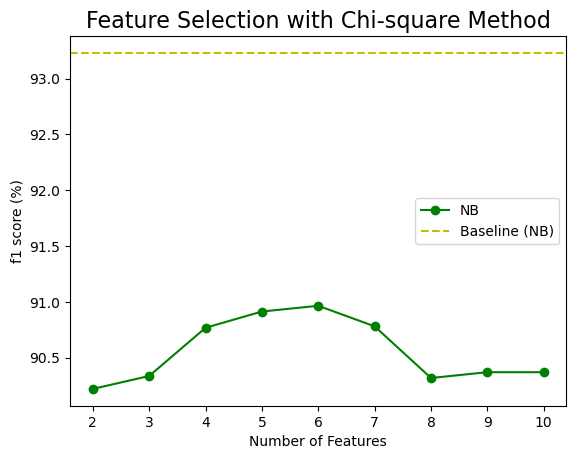

In [167]:
plt.plot(*zip(*sorted(f1score_dict_nb.items())),marker='o', linestyle='-', color='g', label='NB')
plt.axhline(nb_f1_score*100, linestyle='--', color='y', label='Baseline (NB)')
Title = "Feature Selection with Chi-square Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features")
plt.ylabel("f1 score (%)")
plt.legend()

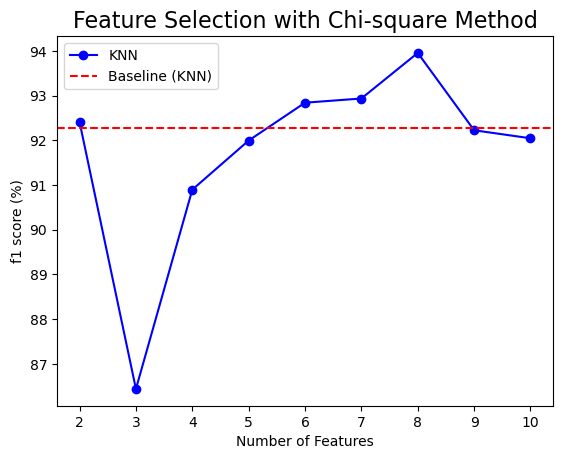

In [168]:
plt.plot(*zip(*sorted(f1score_dict_knn.items())),marker='o', linestyle='-', color='b', label='KNN')
plt.axhline(knn_f1_score*100, linestyle='--', color='r', label='Baseline (KNN)')
Title = "Feature Selection with Chi-square Method"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features")
plt.ylabel("f1 score (%)")
plt.legend()

# b)Wrapper Methods
Forward Feature Elimination

Maximum f1 score nb: 93.22916666666667
Best number of features nb: 2
Maximum f1 score knn: 98.38369641602249
Best number of features knn: 3


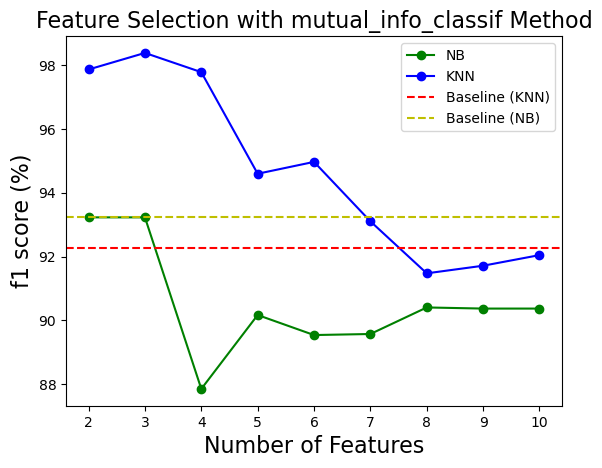

In [169]:

#rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
nb = GaussianNB()
knn=KNeighborsClassifier()

f1score_dict_nb = {}
f1score_dict_knn = {}
for nf in range(2,11):
    fsm =  RFE(estimator=DecisionTreeClassifier(), n_features_to_select=nf)
    f1score = select_feature(X_train, y_train, X_test, y_test, fsm, nb)
    f1score_dict_nb[nf] = f1score
    f1score = select_feature(X_train, y_train, X_test, y_test, fsm, knn)
    f1score_dict_knn[nf] = f1score

plt.plot(*zip(*sorted(f1score_dict_nb.items())),marker='o', linestyle='-', color='g', label='NB')
plt.plot(*zip(*sorted(f1score_dict_knn.items())),marker='o', linestyle='-', color='b', label='KNN')
Title = "Feature Selection with mutual_info_classif Method"
plt.title(Title, fontsize=16)
plt.axhline(knn_f1_score*100, linestyle='--', color='r', label='Baseline (KNN)')
plt.axhline(nb_f1_score*100, linestyle='--', color='y', label='Baseline (NB)')
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("f1 score (%)", fontsize=16)
plt.legend()

print("Maximum f1 score nb:", max(f1score_dict_GB.values()))
print("Best number of features nb:", max(f1score_dict_GB, key=f1score_dict_nb.get))

print("Maximum f1 score knn:", max(f1score_dict_KNN.values()))
print("Best number of features knn:", max(f1score_dict_KNN, key=f1score_dict_knn.get))

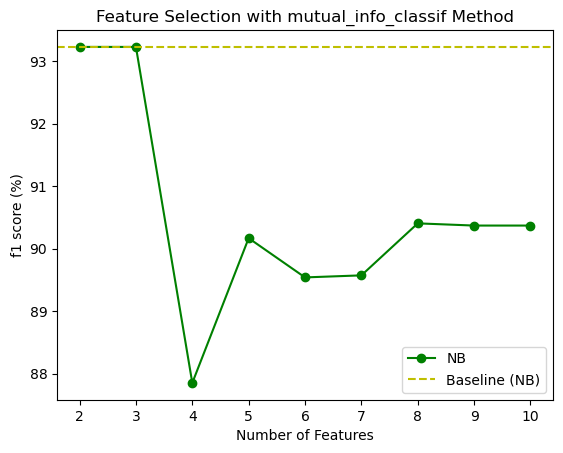

In [170]:
plt.plot(*zip(*sorted(f1score_dict_nb.items())),marker='o', linestyle='-', color='g', label='NB')
Title = "Feature Selection with mutual_info_classif Method"
plt.title(Title)
plt.axhline(nb_f1_score*100, linestyle='--', color='y', label='Baseline (NB)')
plt.xlabel("Number of Features")
plt.ylabel("f1 score (%)")
plt.legend()



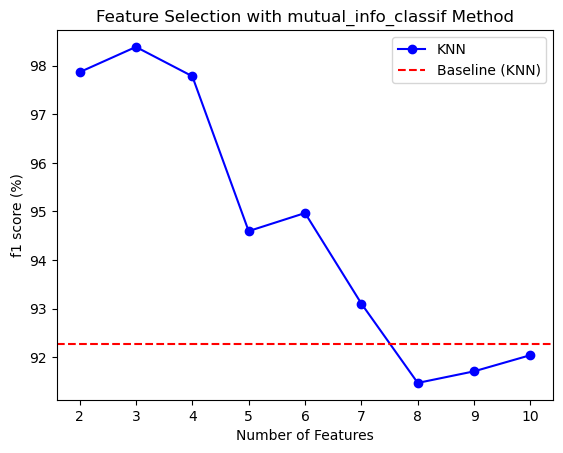

In [171]:
plt.plot(*zip(*sorted(f1score_dict_knn.items())),marker='o', linestyle='-', color='b', label='KNN')
Title = "Feature Selection with mutual_info_classif Method"
plt.title(Title)
plt.axhline(knn_f1_score*100, linestyle='--', color='r', label='Baseline (KNN)')
plt.xlabel("Number of Features")
plt.ylabel("f1 score (%)")
plt.legend()

# c)  2D TSNE plots

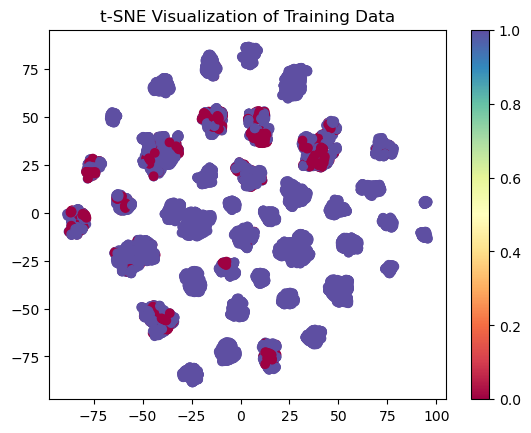

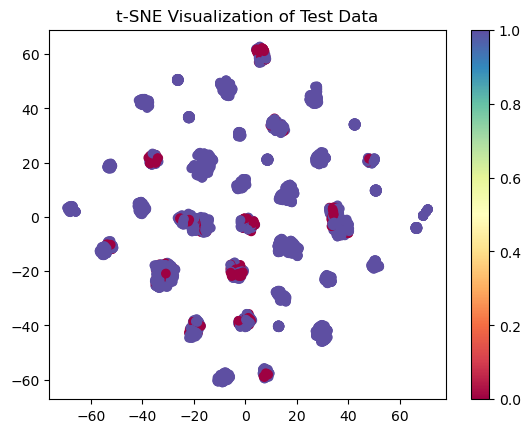

In [12]:
# Apply RFE wrapper method with the selected number of features
num_features = 100
nb_rfe = RFE(LogisticRegression(), n_features_to_select=num_features)
nb_rfe.fit(X_train, y_train)
reduced_train_data_rfe_nb = nb_rfe.transform(X_train)
reduced_test_data_rfe_nb = nb_rfe.transform(X_test)

# Initialize t-SNE model and fit it to the reduced training data
tsne = TSNE(n_components=2, random_state=0)
tsne_train = tsne.fit_transform(reduced_train_data_rfe_nb)

# Plot the t-SNE visualization for the training data
plt.scatter(tsne_train[:, 0], tsne_train[:, 1], c=y_train, cmap='Spectral')
plt.colorbar()
plt.title('t-SNE Visualization of Training Data')
plt.show()

# Apply the trained t-SNE model to the reduced test data
#tsne_test = tsne.transform(reduced_test_data_rfe_nb)

# Apply the trained t-SNE model to the test data
tsne_test = tsne.fit_transform(reduced_test_data_rfe_nb)

# Plot the t-SNE visualization for the test data
plt.scatter(tsne_test[:, 0], tsne_test[:, 1], c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('t-SNE Visualization of Test Data')
plt.show()

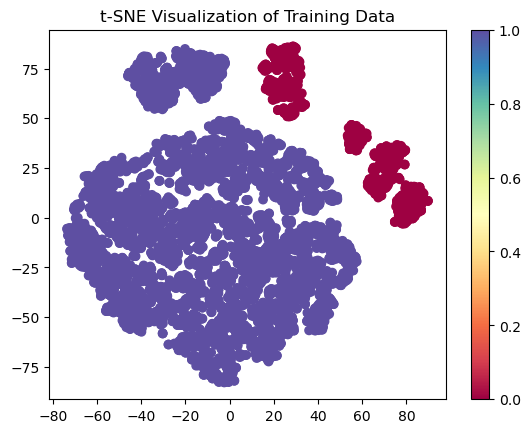

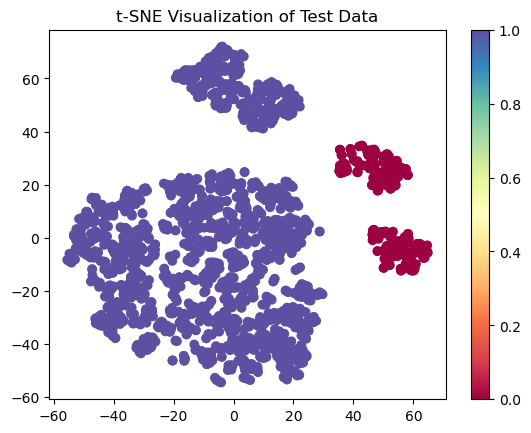

In [11]:


# Define the number of features to select
num_features = 100

# Define the RFE wrapper method with LogisticRegression as the estimator
rfe_wrapper = RFE(LogisticRegression(max_iter=1000), n_features_to_select=num_features)

# Fit the RFE wrapper method to the training data
rfe_wrapper.fit(X_train, y_train)

# Apply the RFE wrapper method to the training and test data
X_train_rfe = rfe_wrapper.transform(X_train)
X_test_rfe = rfe_wrapper.transform(X_test)

# Scale the training and test data using StandardScaler
scaler = StandardScaler()
X_train_rfe_scaled = scaler.fit_transform(X_train_rfe)
X_test_rfe_scaled = scaler.transform(X_test_rfe)

# Define the t-SNE model with 2 components
tsne = TSNE(n_components=2)

# Fit the t-SNE model to the training data
X_train_tsne = tsne.fit_transform(X_train_rfe_scaled)

# Plot the t-SNE visualization for the training data
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='Spectral')
plt.colorbar()
plt.title('t-SNE Visualization of Training Data')
plt.show()

# Apply the trained t-SNE model to the test data
#X_test_tsne = tsne.transform(X_test_rfe_scaled)
X_test_tsne = tsne.fit_transform(X_test_rfe_scaled)

# Plot the t-SNE visualization for the test data
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='Spectral')
plt.colorbar()
plt.title('t-SNE Visualization of Test Data')
plt.show()

# 4)

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from minisom import MiniSom
import matplotlib.pyplot as plt

# Load the data containing the latitude and longitude features
data = pd.read_csv('C:\\Users\\Alaa Rabie\\OneDrive\\Documents\\MCSDatasetNEXTCONLab.csv')
train_df = data[data['Day'].isin([0, 1, 2])]
X_train = train_df.drop(['ID', 'Day'], axis=1)
y_train = train_df['Ligitimacy']
processed_data = X_train[['Latitude', 'Longitude']].values

In [14]:
from sklearn.cluster import KMeans
from collections import Counter

# Filter the data to include only instances where 'Ligitimacy' is equal to 1
filtered_data_1 = train_df[train_df['Ligitimacy'] == 1]
filtered_data_0 = train_df[train_df['Ligitimacy'] == 0]

# Define the desired cluster numbers
desired_clusters = [8, 12, 16, 20, 32]

# Dictionary to store pure value of each desired cluster number
kmeans_dict_desired_clusters = {str(n_clusters): 0 for n_clusters in desired_clusters}

for n_clusters in desired_clusters:
    # Create an instance of KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)

    # Fit the K-means model to the processed_data
    kmeans.fit(processed_data)

    # Get the predicted cluster labels for the filtered data where 'Ligitimacy' is 1
    filtered_predictions_1 = kmeans.predict(filtered_data_1[['Latitude', 'Longitude']].values)

    # Get the predicted cluster labels for the filtered data where 'Ligitimacy' is 0
    filtered_predictions_0 = kmeans.predict(filtered_data_0[['Latitude', 'Longitude']].values)
    Ligitimacy_1 = Counter(filtered_predictions_1)
    Ligitimacy_0 = Counter(filtered_predictions_0)

    for i in Ligitimacy_1:
        if (Ligitimacy_1[i] / (Ligitimacy_1[i] + Ligitimacy_0[i])) >= 0.95:
            kmeans_dict_desired_clusters[str(n_clusters)] += Ligitimacy_1[i]



C:\Users\Alaa Rabie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alaa Rabie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alaa Rabie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.w

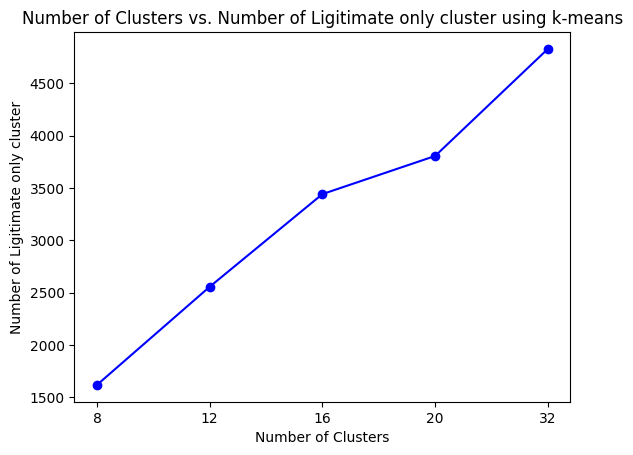

In [15]:
# Extract keys and values from the dictionary
clusters = list(kmeans_dict_desired_clusters.keys())
kMeans_total_legitimate_1 = list(kmeans_dict_desired_clusters.values())

# Create a line chart
plt.plot(clusters, kMeans_total_legitimate_1, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Ligitimate only cluster')
plt.title('Number of Clusters vs. Number of Ligitimate only cluster using k-means')

# Display the chart
plt.show()

# b)# Apply SOFM algorithm

In [8]:
from minisom import MiniSom
from collections import Counter
import matplotlib.pyplot as plt

# Filter the data to include only instances where 'Ligitimacy' is equal to 1
filtered_data_1 = train_df[train_df['Ligitimacy'] == 1]
filtered_data_0 = train_df[train_df['Ligitimacy'] == 0]

# Extract latitude and longitude values for processed_data
processed_data = data[['Latitude', 'Longitude']].values

# Define the desired number of clusters
desired_clusters = [8, 12, 16, 20, 32]

# Dictionary to store pure value of each desired number of clusters
dict_desired_clusters = {str(n_clusters): 0 for n_clusters in desired_clusters}

for n_clusters in desired_clusters:
    # Calculate the grid size based on the desired number of clusters
    grid_size = (int(n_clusters ** 0.5), int(n_clusters ** 0.5))

    # Create an instance of MiniSom with the current grid size
    som = MiniSom(grid_size[0], grid_size[1], processed_data.shape[1], sigma=0.5, learning_rate=0.5)

    # Initialize the weights using the processed_data
    som.random_weights_init(processed_data)

    # Train the SOM with the processed_data
    som.train_batch(processed_data, 100)

    # Calculate the best matching unit (BMU) for the filtered data where 'Ligitimacy' is 1
    bmu_indices_1 = [som.winner(processed_data[idx]) for idx, _ in filtered_data_1.iterrows()]

    # Calculate the best matching unit (BMU) for the filtered data where 'Ligitimacy' is 0
    bmu_indices_0 = [som.winner(processed_data[idx]) for idx, _ in filtered_data_0.iterrows()]

    Ligitimacy_1 = Counter(bmu_indices_1)
    Ligitimacy_0 = Counter(bmu_indices_0)

    for i in Ligitimacy_1:
        if (Ligitimacy_1[i] / (Ligitimacy_1[i] + Ligitimacy_0[i])) >= 0.95:
            dict_desired_clusters[str(n_clusters)] += Ligitimacy_1[i]




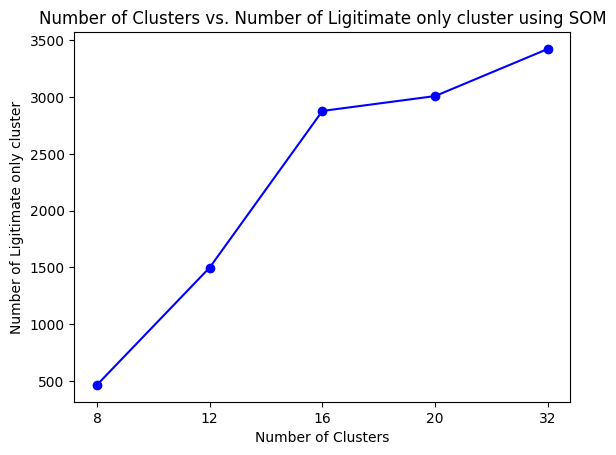

In [9]:
# Extract keys and values from the dictionary
clusters = list(dict_desired_clusters.keys())
som_total_legitimate_1 = list(dict_desired_clusters.values())

# Create a line chart
plt.plot(clusters, som_total_legitimate_1, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Ligitimate only cluster')
plt.title('Number of Clusters vs. Number of Ligitimate only cluster using SOM')

# Display the chart
plt.show()

# c)DBSCAN algorithm

In [10]:
from sklearn.cluster import DBSCAN
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from tqdm import tqdm

# Filter the data to include only instances where 'Ligitimacy' is equal to 1
filtered_data_1 = train_df[train_df['Ligitimacy'] == 1]
filtered_data_0 = train_df[train_df['Ligitimacy'] == 0]

# Define the desired cluster numbers
desired_clusters = [8,9, 12, 16, 20,23,30,32]

comb = dict(epsilon=[],minpoints=[],clust=[])
for epsilon in np.arange(0.006,0.7+0.05,0.05):
    for minpoints in range(1,30):
        db = DBSCAN(eps=epsilon,min_samples=minpoints)
        db.fit(processed_data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        clusters = len(set(labels)) - (1 if -1 in labels else 0 )
        if clusters in desired_clusters :
            comb['epsilon'].append(epsilon)
            comb['minpoints'].append(minpoints)
            comb['clust'].append(clusters)


In [11]:
result_dict = dict(zip(comb['clust'], comb['minpoints']))
result_dict

{30: 3, 23: 4, 16: 7, 12: 21, 9: 14}

In [12]:
from sklearn.cluster import DBSCAN
from collections import Counter
import matplotlib.pyplot as plt

# Filter the data to include only instances where 'Ligitimacy' is equal to 1
filtered_data_1 = train_df[train_df['Ligitimacy'] == 1]
filtered_data_0 = train_df[train_df['Ligitimacy'] == 0]

# Extract latitude and longitude values for processed_data
processed_data = data[['Latitude', 'Longitude']].values

# Define the desired number of clusters
desired_clusters = [30, 23, 16, 12, 9]

# Dictionary to store pure value of each desired number of clusters
DBSCAN_desired_clusters = {str(n_clusters): 0 for n_clusters in desired_clusters}
for cluster, minpoints in result_dict.items():
    print(f"Cluster: {cluster}, Minpoints: {minpoints}")

    # Create an instance of DBSCAN with the desired parameters
    dbscan = DBSCAN(eps=0.006, min_samples=minpoints)

    # Fit the DBSCAN model to the processed_data
    dbscan.fit(processed_data)

    # Get the predicted cluster labels for the filtered data where 'Ligitimacy' is 1
    filtered_predictions_1 = dbscan.labels_[filtered_data_1.index]

    # Get the predicted cluster labels for the filtered data where 'Ligitimacy' is 0
    filtered_predictions_0 = dbscan.labels_[filtered_data_0.index]
    
    # Calculate the number of instances for each cluster label in the filtered data
    Ligitimacy_1 = Counter(filtered_predictions_1)
    Ligitimacy_0 = Counter(filtered_predictions_0)

    for i in Ligitimacy_1:
        if (Ligitimacy_1[i] / (Ligitimacy_1[i] + Ligitimacy_0[i])) >= 0.95:
            DBSCAN_desired_clusters[str(cluster)] += Ligitimacy_1[i]



Cluster: 30, Minpoints: 3
Cluster: 23, Minpoints: 4
Cluster: 16, Minpoints: 7
Cluster: 12, Minpoints: 21
Cluster: 9, Minpoints: 14


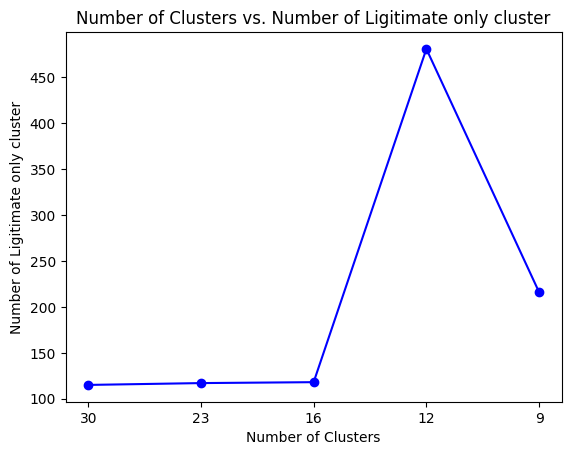

In [13]:

# Extract keys and values from the dictionary
clusters = list(DBSCAN_desired_clusters.keys())
DBSCAN_total_legitimate_1 = list(DBSCAN_desired_clusters.values())

# Create a line chart
plt.plot(clusters, DBSCAN_total_legitimate_1, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Ligitimate only cluster')
plt.title('Number of Clusters vs. Number of Ligitimate only cluster')

# Display the chart
plt.show()